# Import Libraries

In [1]:
import pandas as pd
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df_l = pd.read_csv('Raw/listings.csv')

C:\Users\GAMER\AppData\Local\Temp\ipykernel_9800\1313454368.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_l = pd.read_csv('Raw/listings.csv')


# Data Exploration

In [3]:
# First lines of the Dataset
df_l.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27


In [4]:
# Number of rows and columns in the Dataset
df_l.shape

(87946, 75)

In [5]:
# Dataset info
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

In [6]:
# Frequency of data types
df_l.dtypes.value_counts()

object     35
float64    23
int64      17
dtype: int64

In [7]:
# Unique values in each column
df_l.nunique()

id                                              87946
listing_url                                     87946
scrape_id                                           1
last_scraped                                        2
source                                              2
                                                ...  
calculated_host_listings_count                     92
calculated_host_listings_count_entire_homes        87
calculated_host_listings_count_private_rooms       43
calculated_host_listings_count_shared_rooms        11
reviews_per_month                                 944
Length: 75, dtype: int64

In [8]:
# Statistical description of only the numeric columns of the Dataset
df_l.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.794600e+04,8.794600e+04,8.794600e+04,87941.000000,87941.000000,0.0,87946.000000,87946.000000,87946.000000,0.0,...,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000
mean,3.586523e+17,2.023091e+13,1.589904e+08,48.666629,85.809804,NaN,51.509557,-0.127900,3.165386,NaN,...,4.623333,4.777310,4.798890,4.720487,4.593404,18.140950,13.852284,4.133548,0.029154,1.014903
std,4.121119e+17,0.000000e+00,1.694033e+08,293.465172,523.634388,NaN,0.048749,0.099645,1.980390,NaN,...,0.551075,0.457757,0.451838,0.421893,0.536391,63.745275,46.876541,24.742723,0.490367,1.365452
min,1.391300e+04,2.023091e+13,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.215818e+07,2.023091e+13,2.186737e+07,1.000000,1.000000,NaN,51.483371,-0.189174,2.000000,NaN,...,4.500000,4.750000,4.790000,4.630000,4.490000,1.000000,0.000000,0.000000,0.000000,0.150000
50%,4.935854e+07,2.023091e+13,8.140696e+07,2.000000,3.000000,NaN,51.513780,-0.126400,2.000000,NaN,...,4.800000,4.940000,4.970000,4.840000,4.740000,2.000000,1.000000,0.000000,0.000000,0.540000
75%,8.164776e+17,2.023091e+13,2.668211e+08,7.000000,10.000000,NaN,51.539420,-0.068066,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,3.000000,1.000000,0.000000,1.320000
max,9.738958e+17,2.023091e+13,5.355140e+08,3023.000000,5272.000000,NaN,51.681642,0.295731,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,312.000000,285.000000,18.000000,50.250000


In [9]:
# Null values in the Dataset
df_l.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    87946
bathrooms                       87946
calendar_updated                87946
license                         87945
host_about                      42040
                                ...  
accommodates                        0
listing_url                         0
amenities                           0
price                               0
id                                  0
Length: 75, dtype: int64

# Data Cleansing

In [10]:
# Exclude columns that contain more than 10% null values: 
df_l = df_l.loc[:, (df_l.isnull().sum(axis=0) < len(df_l)*0.1)]
df_l.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,...,217,2023-09-06,216,9,0,t,1,0,1,0
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,...,40,2023-09-06,38,2,0,f,1,1,0,0


In [11]:
# New number of rows and columns in the Dataset
df_l.shape

(87946, 52)

In [12]:
df_l.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable',
       'calculat

Exclude all columns that are initially assumed to be irrelevant to the business question by reading the data dictionary found on the website: http://insideairbnb.com/

In [13]:
# Exclude all columns except these.

df_l = df_l.drop(df_l.columns.difference(['id', 'name', 'host_id','host_is_superhost', 'host_identity_verified',
                                          'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
                                          'room_type', 'accommodates', 'beds', 'bed_type',
                                          'price', 'minimum_nights', 
                                          'number_of_reviews', 'instant_bookable', 'calculated_host_listings_count'
                                         ]), 1)

C:\Users\GAMER\AppData\Local\Temp\ipykernel_9800\3458535506.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_l = df_l.drop(df_l.columns.difference(['id', 'name', 'host_id','host_is_superhost', 'host_identity_verified',


In [14]:
# New number of rows and columns in the Dataset
df_l.shape

(87946, 17)

In [15]:
# Leftover null values
df_l.isnull().sum().sort_values(ascending=False)

beds                              1134
host_is_superhost                  932
host_identity_verified               5
id                                   0
accommodates                         0
instant_bookable                     0
number_of_reviews                    0
minimum_nights                       0
price                                0
property_type                        0
room_type                            0
name                                 0
longitude                            0
latitude                             0
neighbourhood_cleansed               0
host_id                              0
calculated_host_listings_count       0
dtype: int64

Replace null values with the median in numerical variables (beds) and with the mode in categorical variables (host_is_superhost and host_identity_verified).

In [16]:
# Replace null values with the median in the 'beds' column
median_beds = sts.median(df_l['beds'])
df_l['beds'].fillna(median_beds, inplace=True)

In [17]:
# Replace null values with mode in column 'host_is_superhost'
mode_host_is_superhost = sts.mode(df_l['host_is_superhost'])
df_l['host_is_superhost'].fillna(mode_host_is_superhost, inplace=True)

In [18]:
# Replace null values with mode in column 'host_identity_verified '
mode_host_identity_verified = sts.mode(df_l['host_identity_verified'])
df_l['host_identity_verified'].fillna(mode_host_identity_verified , inplace=True)

In [19]:
# Leftover null values
df_l.isnull().sum().sort_values(ascending=False)

id                                0
room_type                         0
instant_bookable                  0
number_of_reviews                 0
minimum_nights                    0
price                             0
beds                              0
accommodates                      0
property_type                     0
name                              0
longitude                         0
latitude                          0
neighbourhood_cleansed            0
host_identity_verified            0
host_is_superhost                 0
host_id                           0
calculated_host_listings_count    0
dtype: int64

In [20]:
# Remove the $ symbol from the 'price' column and transform it into a float
df_l['price'] = df_l['price'].astype(str).str.replace("$", "").str.replace(',', '', regex = 'true').astype (float)

C:\Users\GAMER\AppData\Local\Temp\ipykernel_9800\760667124.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_l['price'] = df_l['price'].astype(str).str.replace("$", "").str.replace(',', '', regex = 'true').astype (float)


In [21]:
# Conversion to integer the "beds" column
df_l['beds'] = df_l['beds'].astype(int)

# Questions

Quantifiable questions, from 1 to 6:

1. What is the average price of accommodation?

2. What are the Top 10 most expensive and cheapest accommodations?

3. What are the Top 10 most expensive and cheapest neighborhoods?

4. What are the Top 10 property types most offered?

5. What are the Top 10 property types most rentable?

6. Which neighborhoods have the highest number of accommodations?

Non-quantifiable questions, from 7 to 10:

7. Do accommodations with instant booking have greater gains?

8. Are super host generally more expensive?

9. Are verified host generally more expensive?

10. What factors most influence price?

## What is the average price of accommodation?

In [22]:
mean_price = df_l['price'].mean()

In [23]:
print(f'The average price of accommodation is: $ {round(mean_price,2)}')

The average price of accommodation is: $ 181.35


## What are the Top 10 most expensive and cheapest accommodations?

In [24]:
df_t = df_l.groupby('name')['price'].mean().sort_values(ascending=False).reset_index()
df_largest = df_t.nlargest(10, 'price')[['name', 'price']]
df_smallest = df_t.nsmallest(10, 'price')[['name', 'price']]
df_smallest = df_smallest.sort_values(by='price', ascending=False)

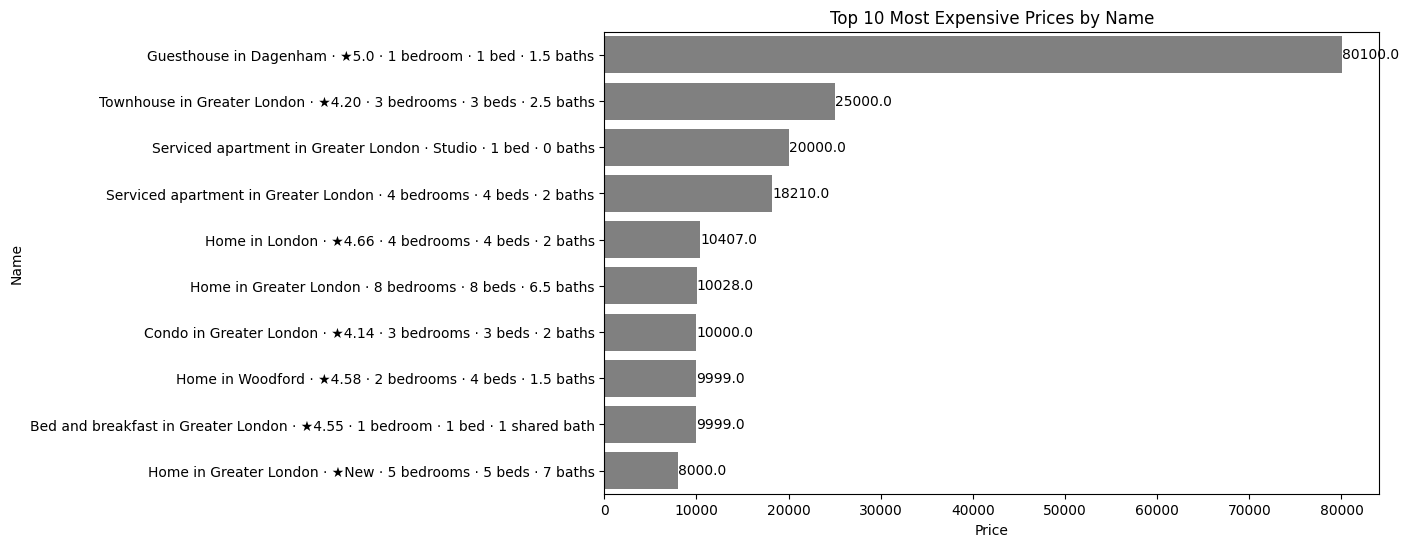

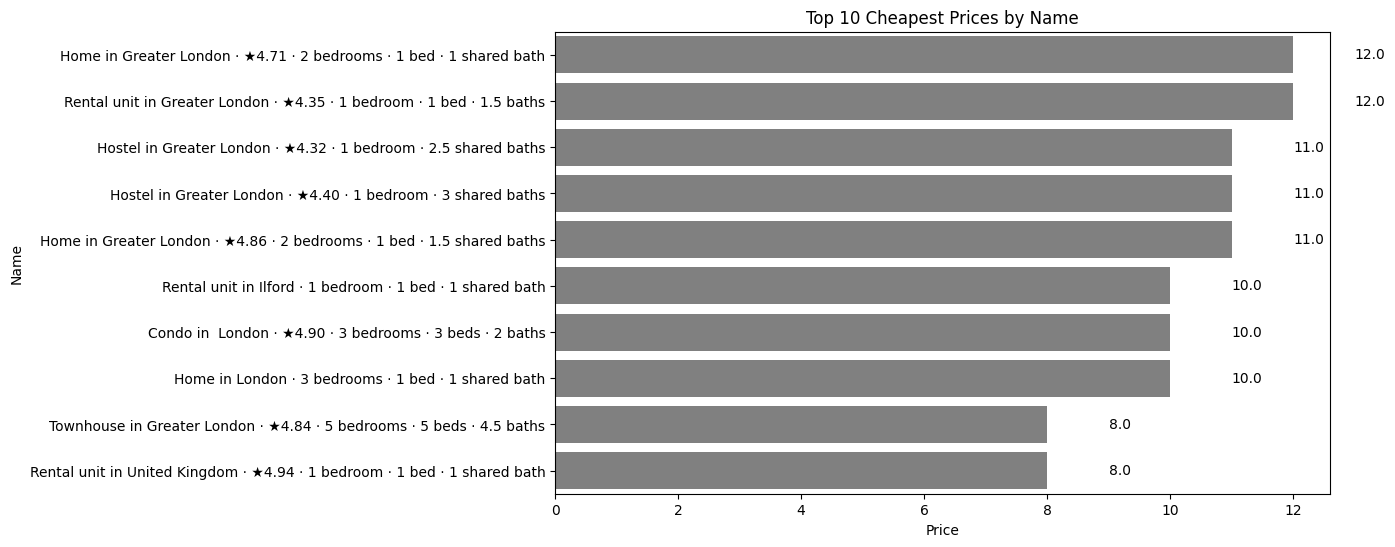

In [25]:
def add_value_labels(ax, bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval + 1, bar.get_y() + bar.get_height() / 2, round(xval, 2), va='center', ha='left')

# Plotting the first bar chart with Seaborn
plt.figure(figsize=(10, 6))
bars_largest = sns.barplot(x='price', y='name', data=df_largest, color='gray')
plt.xlabel('Price')
plt.ylabel('Name')
plt.title('Top 10 Most Expensive Prices by Name')

# Adding labels with values at the end of each bar
add_value_labels(plt.gca(), bars_largest.patches)

plt.show()

# Plotting the second bar chart with Seaborn
plt.figure(figsize=(10, 6))
bars_smallest = sns.barplot(x='price', y='name', data=df_smallest, color='gray')
plt.xlabel('Price')
plt.ylabel('Name')
plt.title('Top 10 Cheapest Prices by Name')

# Adding labels with values at the end of each bar
add_value_labels(plt.gca(), bars_smallest.patches)

plt.show()

## What are the Top 10 most expensive and cheapest neighborhoods?

In [26]:
df_t = df_l.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).reset_index()
df_t.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)
df_largest = df_t.nlargest(10, 'price')[['neighbourhood', 'price']]
df_smallest = df_t.nsmallest(10, 'price')[['neighbourhood', 'price']]
df_smallest = df_smallest.sort_values(by='price', ascending=False)

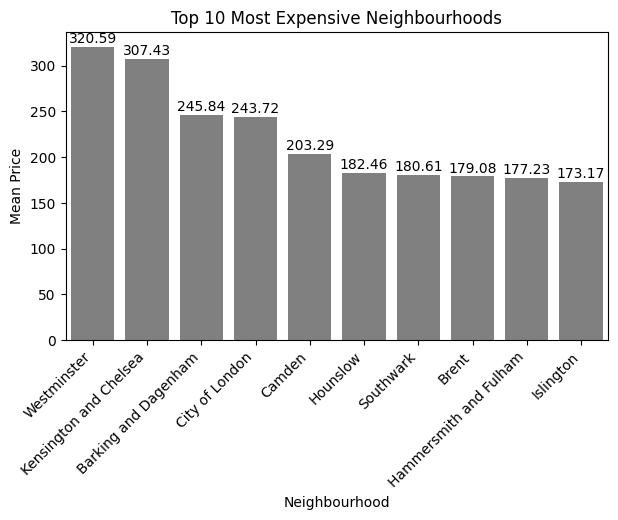

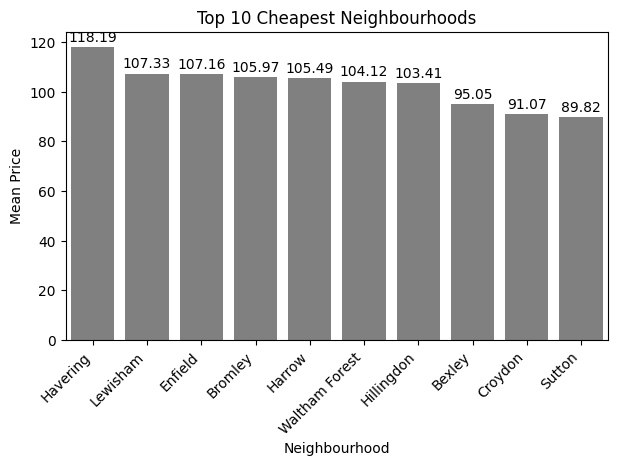

In [27]:
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, round(height, 2), ha='center', va='bottom')

# Plotting the first bar chart with Seaborn
plt.figure(figsize=(7, 4))
bars_largest = sns.barplot(x='neighbourhood', y='price', data=df_largest, color='gray')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.title('Top 10 Most Expensive Neighbourhoods')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding labels with values at the end of each bar
add_value_labels(plt.gca(), bars_largest.patches)

plt.show()

# Plotting the second bar chart with Seaborn
plt.figure(figsize=(7, 4))
bars_smallest = sns.barplot(x='neighbourhood', y='price', data=df_smallest, color='gray')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.title('Top 10 Cheapest Neighbourhoods')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding labels with values at the end of each bar
add_value_labels(plt.gca(), bars_smallest.patches)

plt.show()

## What are the Top 10 property types most offered?

In [28]:
total_count = len(df_l)
top_property_types = df_l['property_type'].value_counts().nlargest(10)
percentage_values = (top_property_types / total_count) * 100

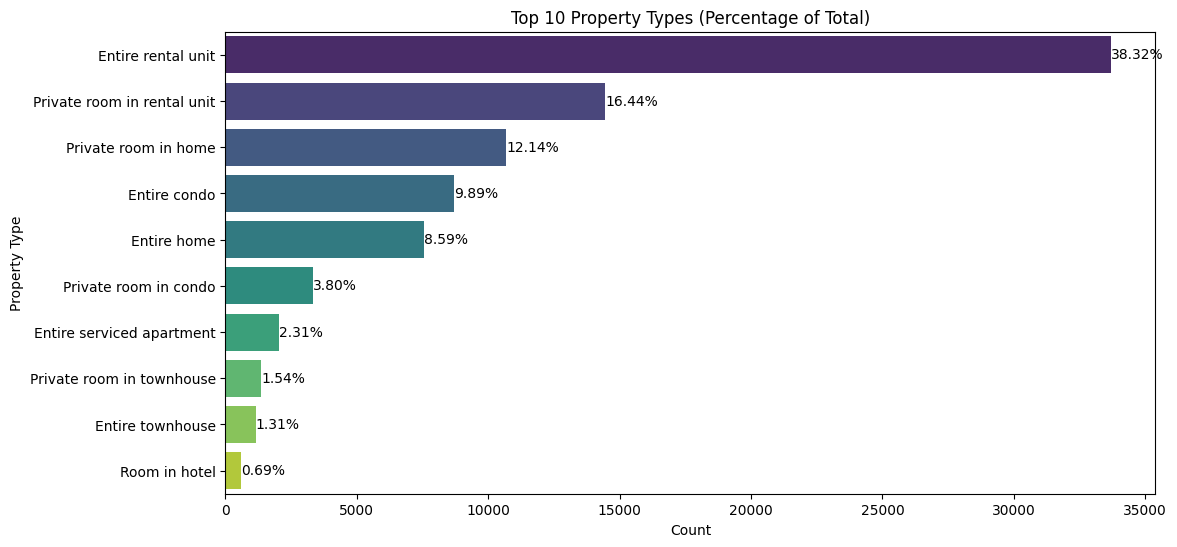

In [29]:
# Plotting a countplot with percentages as labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='property_type', data=df_l, order=top_property_types.index, palette='viridis')

# Add percentage labels to the bars
for i, v in enumerate(top_property_types):
    percentage = percentage_values.iloc[i]
    ax.text(v + 0.2, i, f'{percentage:.2f}%', color='black', va='center')

plt.title('Top 10 Property Types (Percentage of Total)')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

## What are the Top 10 property types most rentable?

In [30]:
top_property_types = df_l.groupby('property_type')['price'].mean()
top_property_types = top_property_types.nlargest(10)

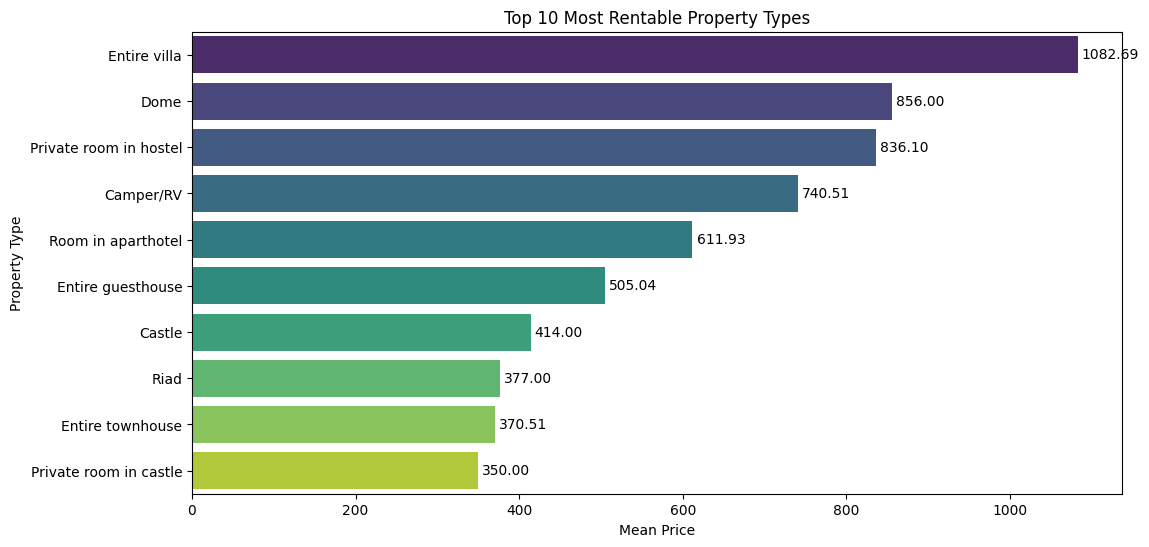

In [31]:
# Plotting a horizontal bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_property_types.values, y=top_property_types.index, palette='viridis')

# Add mean price values at the end of each bar
for i, v in enumerate(top_property_types.values):
    ax.text(v + 5, i, f'{v:.2f}', color='black', va='center')

plt.title('Top 10 Most Rentable Property Types')
plt.xlabel('Mean Price')
plt.ylabel('Property Type')
plt.show()

## Which neighborhoods have the highest number of accommodations?

In [32]:
top_neighbourhoods = df_l['neighbourhood_cleansed'].value_counts().nlargest(10)

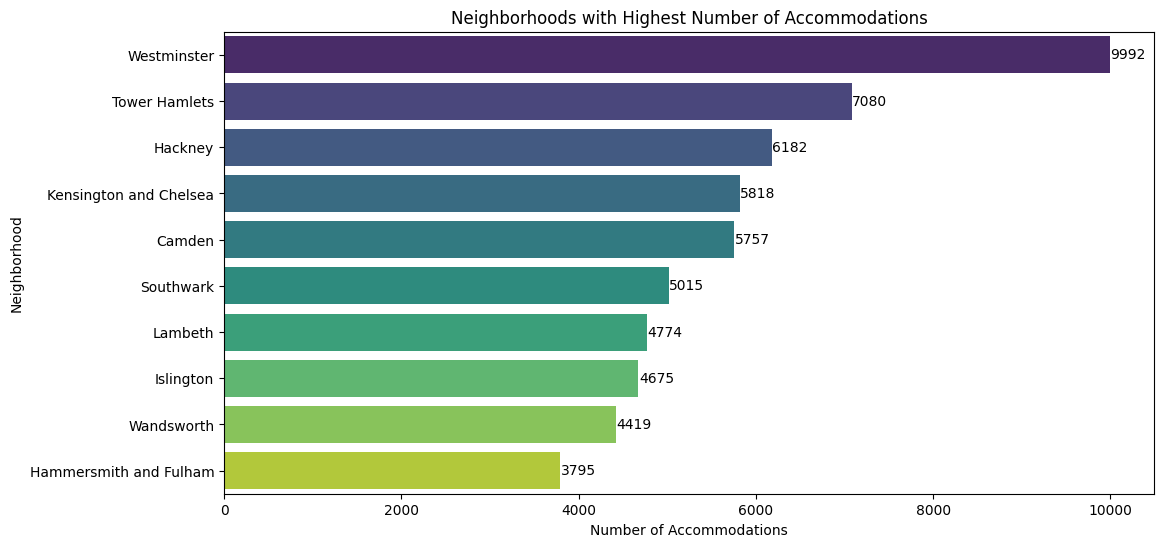

In [33]:
# Plotting a horizontal bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='viridis')

for i, v in enumerate(top_neighbourhoods.values):
    ax.text(v + 5, i, f'{v}', color='black', va='center')

plt.title('Neighborhoods with Highest Number of Accommodations')
plt.xlabel('Number of Accommodations')
plt.ylabel('Neighborhood')
plt.show()

## Do accommodations with instant booking have greater gains?

In [34]:
df_l['instant_bookable'] = df_l['instant_bookable'].map({'t': True, 'f': False})
mean_prices = df_l.groupby('instant_bookable')['price'].mean()

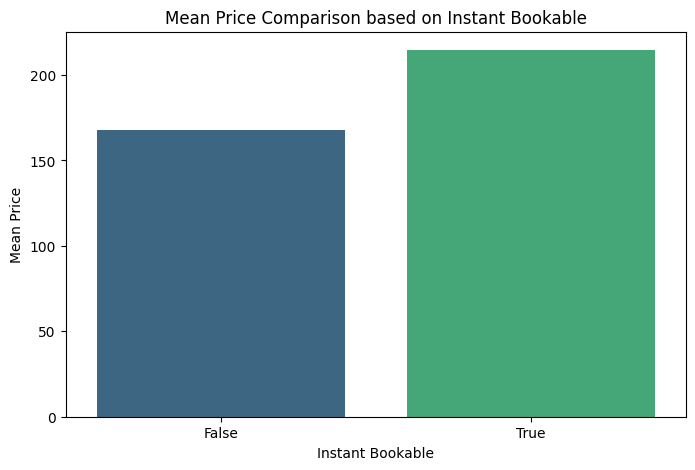


Answer: Yes.


In [35]:
# Plotting a bar plot for mean prices
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='viridis')
plt.title('Mean Price Comparison based on Instant Bookable')
plt.xlabel('Instant Bookable')
plt.ylabel('Mean Price')
plt.show()
print('')
print('Answer: Yes.')

## Are super host generally more expensive?

In [36]:
# Removing Price Outliers
# Calculate the IQR for 'price'
Q1 = df_l['price'].quantile(0.15)
Q3 = df_l['price'].quantile(0.85)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_l['price'] < lower_bound) | (df_l['price'] > upper_bound)

# Create a new DataFrame (df_t) without outliers in the 'price' column
df_t = df_l[~outliers].copy()

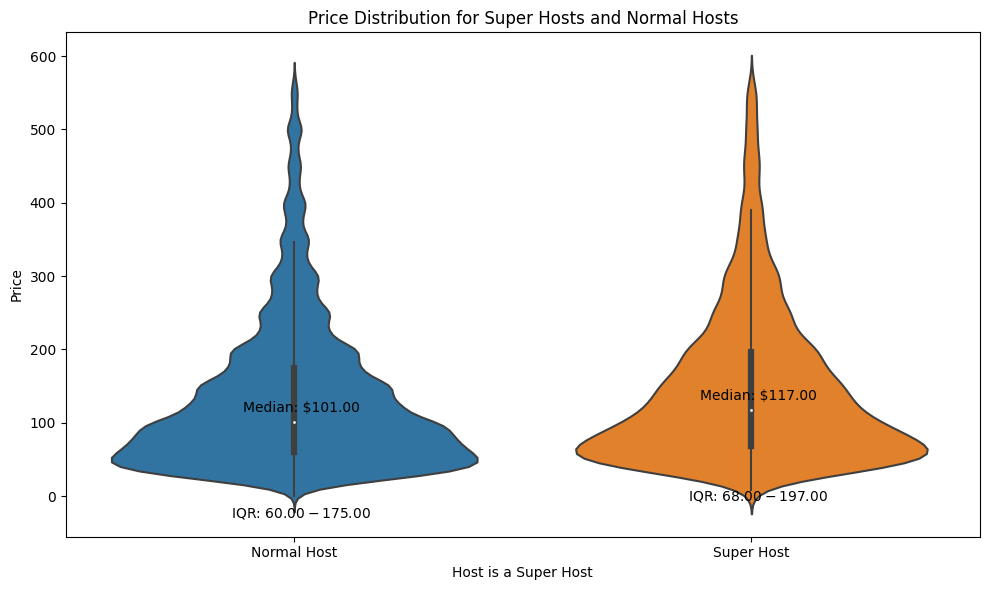


Answer: the differences are not statistically significant for us to state that there is a difference.


In [37]:
# Create a box plot or violin plot to compare prices for verified and unverified users
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='host_is_superhost', y='price', data=df_t)
plt.xlabel('Host is a Super Host')
plt.ylabel('Price')
plt.title('Price Distribution for Super Hosts and Normal Hosts')
plt.xticks([0, 1], ['Normal Host', 'Super Host'])

# Add labels for median and interquartile ranges
medians = df_t.groupby('host_is_superhost')['price'].median()
q1 = df_t.groupby('host_is_superhost')['price'].quantile(0.25)
q3 = df_t.groupby('host_is_superhost')['price'].quantile(0.75)

for xtick, label in enumerate(ax.get_xticklabels()):
    ax.annotate(f"Median: ${medians[xtick]:.2f}", (xtick, medians[xtick]), 
                xytext=(5, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)
    ax.annotate(f"IQR: ${q1[xtick]:.2f} - ${q3[xtick]:.2f}", (xtick, q3[xtick]), 
                xytext=(5, -110), textcoords='offset points', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()
print('')
print('Answer: the differences are not statistically significant for us to state that there is a difference.')

## Are verified host generally more expensive?

In [38]:
# Removing Price Outliers
# Calculate the IQR for 'price'
Q1 = df_l['price'].quantile(0.15)
Q3 = df_l['price'].quantile(0.85)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_l['price'] < lower_bound) | (df_l['price'] > upper_bound)

# Create a new DataFrame (df_t) without outliers in the 'price' column
df_t = df_l[~outliers].copy()

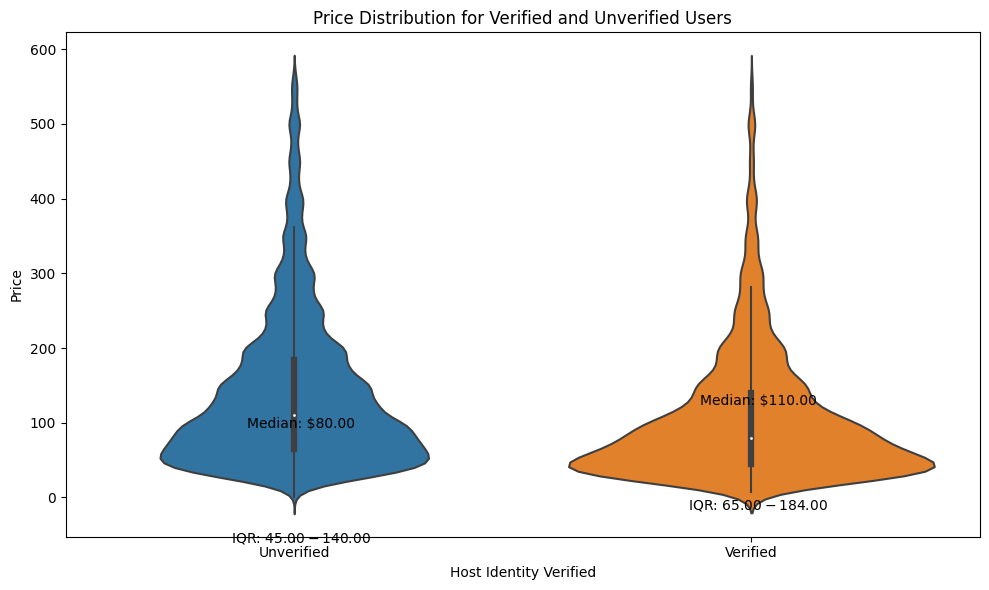


Answer: the differences are not statistically significant for us to state that there is a difference.


In [39]:
# Create a box plot or violin plot to compare prices for verified and unverified users
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='host_identity_verified', y='price', data=df_t)
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.title('Price Distribution for Verified and Unverified Users')
plt.xticks([0, 1], ['Unverified', 'Verified'])

# Add labels for median and interquartile ranges
medians = df_t.groupby('host_identity_verified')['price'].median()
q1 = df_t.groupby('host_identity_verified')['price'].quantile(0.25)
q3 = df_t.groupby('host_identity_verified')['price'].quantile(0.75)

for xtick, label in enumerate(ax.get_xticklabels()):
    ax.annotate(f"Median: ${medians[xtick]:.2f}", (xtick, medians[xtick]), 
                xytext=(5, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)
    ax.annotate(f"IQR: ${q1[xtick]:.2f} - ${q3[xtick]:.2f}", (xtick, q3[xtick]), 
                xytext=(5, -110), textcoords='offset points', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()
print('')
print('Answer: the differences are not statistically significant for us to state that there is a difference.')

## Which factors most influence price?

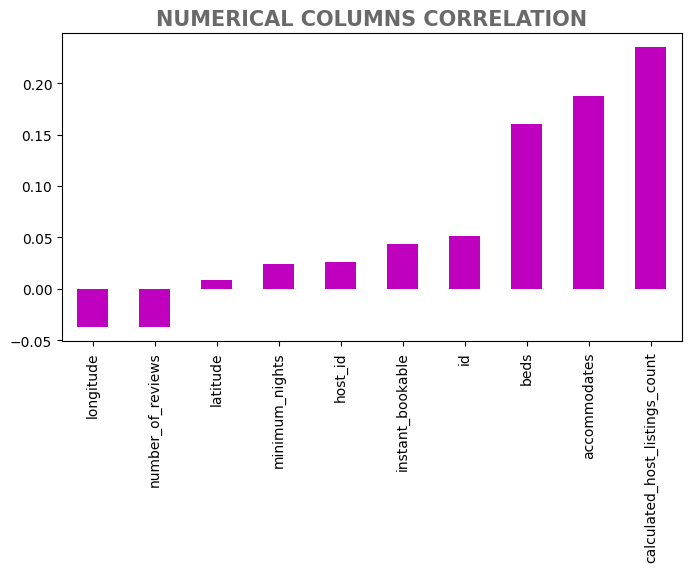


Answer: the factors that most influence price are calculated_host_listings_count, accommodates and beds.


In [40]:
# Correlation between quantitative columns
plt.figure(figsize=(8,4))
df_l.corr(numeric_only=True)['price'].sort_values()[:-1].plot(kind='bar', color='m')
plt.title('NUMERICAL COLUMNS CORRELATION', fontsize = 15, color ='dimgrey', fontweight = 'bold')
plt.show();
print('')
print('Answer: the factors that most influence price are calculated_host_listings_count, accommodates and beds.')